In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score


In [2]:
file_path = r'~/Downloads/USD/ADS_500B/house_sales.csv'
house_sales = pd.read_csv(file_path)

In [3]:
# Display dataset info
house_sales.info()

# Preview the first 5 rows
display(house_sales.head())

# Shape of the dataset
print("Dataset Shape:", house_sales.shape)

# Check for missing values
print("Missing Values:\n", house_sales.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Dataset Shape: (21613, 21)
Missing Values:
 id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [4]:
# Calculate the median for columns with missing values
bedrooms_median = house_sales['bedrooms'].median()
bathrooms_median = house_sales['bathrooms'].median()
sqft_living_median = house_sales['sqft_living'].median()
sqft_lot_median = house_sales['sqft_lot'].median()

# Print the medians
print("Medians:")
print(f"Bedrooms: {bedrooms_median}")
print(f"Bathrooms: {bathrooms_median}")
print(f"Sqft Living: {sqft_living_median}")
print(f"Sqft Lot: {sqft_lot_median}")


Medians:
Bedrooms: 3.0
Bathrooms: 2.25
Sqft Living: 1920.0
Sqft Lot: 7620.0


In [5]:
# Impute missing values with the median
house_sales['bedrooms'] = house_sales['bedrooms'].fillna(bedrooms_median)
house_sales['bathrooms'] = house_sales['bathrooms'].fillna(bathrooms_median)
house_sales['sqft_living'] = house_sales['sqft_living'].fillna(sqft_living_median)
house_sales['sqft_lot'] = house_sales['sqft_lot'].fillna(sqft_lot_median)

# Verify that there are no more missing values
print("Missing Values After Imputation:\n", house_sales.isnull().sum())



Missing Values After Imputation:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
# Convert 'date' column to datetime format
house_sales['date'] = pd.to_datetime(house_sales['date'], format='%Y%m%dT%H%M%S')

# Verify the conversion
print(house_sales['date'].dtypes)
house_sales['date'].head()


datetime64[ns]


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [7]:
# Separate columns by data type
numerical_columns = house_sales.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = house_sales.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [8]:
# Check for duplicates
duplicates = house_sales.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    house_sales = house_sales.drop_duplicates()
    print(f"Duplicate rows removed. New dataset shape: {house_sales.shape}")


Number of duplicate rows: 0


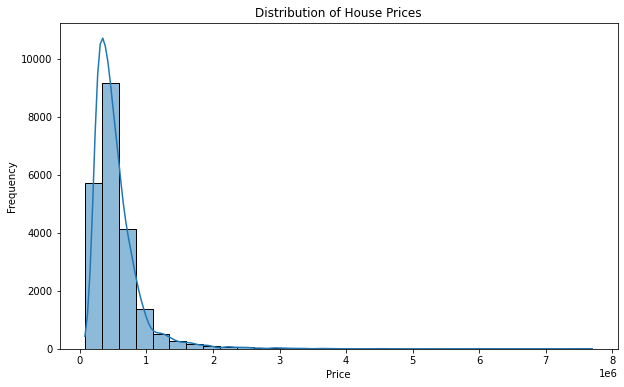

In [9]:
# Plot distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(house_sales['price'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


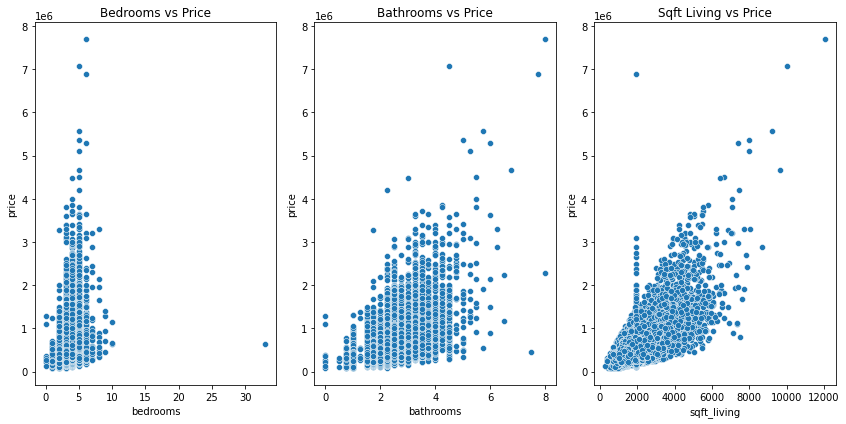

In [10]:
# Scatterplots for key features against price
plt.figure(figsize=(12, 6))

# Bedrooms vs Price
plt.subplot(1, 3, 1)
sns.scatterplot(x=house_sales['bedrooms'], y=house_sales['price'])
plt.title("Bedrooms vs Price")

# Bathrooms vs Price
plt.subplot(1, 3, 2)
sns.scatterplot(x=house_sales['bathrooms'], y=house_sales['price'])
plt.title("Bathrooms vs Price")

# Sqft Living vs Price
plt.subplot(1, 3, 3)
sns.scatterplot(x=house_sales['sqft_living'], y=house_sales['price'])
plt.title("Sqft Living vs Price")

plt.tight_layout()
plt.show()


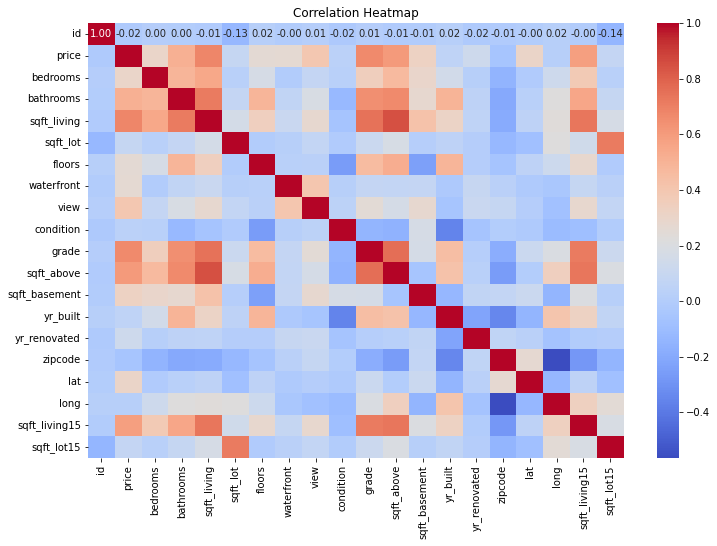

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = house_sales.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


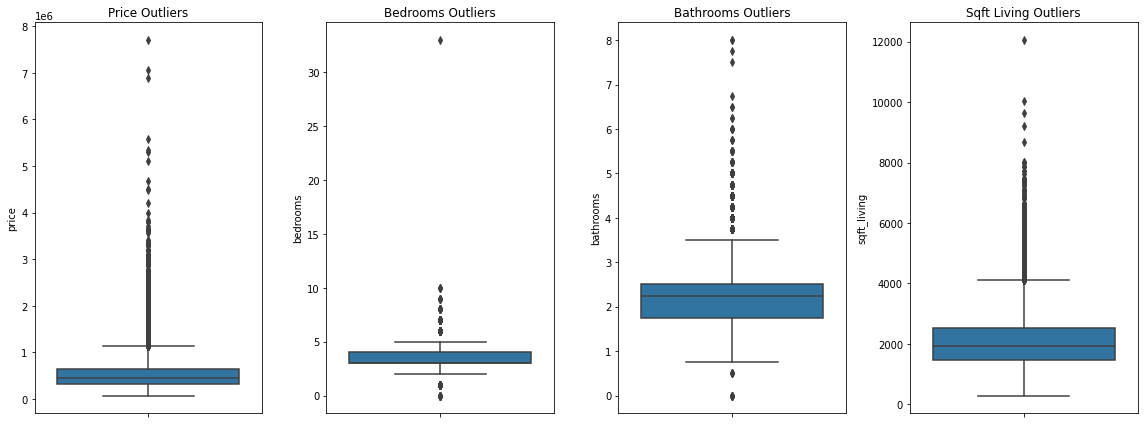

In [12]:
# Boxplots for key variables
plt.figure(figsize=(16, 6))

# Price
plt.subplot(1, 4, 1)
sns.boxplot(y=house_sales['price'])
plt.title('Price Outliers')

# Bedrooms
plt.subplot(1, 4, 2)
sns.boxplot(y=house_sales['bedrooms'])
plt.title('Bedrooms Outliers')

# Bathrooms
plt.subplot(1, 4, 3)
sns.boxplot(y=house_sales['bathrooms'])
plt.title('Bathrooms Outliers')

# Sqft Living
plt.subplot(1, 4, 4)
sns.boxplot(y=house_sales['sqft_living'])
plt.title('Sqft Living Outliers')

plt.tight_layout()
plt.show()


In [13]:
# Function to calculate outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                     # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

# Detect outliers for key variables
price_outliers = detect_outliers(house_sales, 'price')
bedroom_outliers = detect_outliers(house_sales, 'bedrooms')
bathroom_outliers = detect_outliers(house_sales, 'bathrooms')
sqft_living_outliers = detect_outliers(house_sales, 'sqft_living')


price: 1146 outliers detected
bedrooms: 518 outliers detected
bathrooms: 542 outliers detected
sqft_living: 651 outliers detected


In [14]:
# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)
    print(f"{column}: Outliers capped at [{lower_bound}, {upper_bound}]")

# Cap outliers for key variables
cap_outliers(house_sales, 'price')
cap_outliers(house_sales, 'bedrooms')
cap_outliers(house_sales, 'bathrooms')
cap_outliers(house_sales, 'sqft_living')

# Verify changes
print(house_sales[['price', 'bedrooms', 'bathrooms', 'sqft_living']].describe())


price: Outliers capped at [-162625.0, 1129575.0]
bedrooms: Outliers capped at [1.5, 5.5]
bathrooms: Outliers capped at [0.625, 3.625]
sqft_living: Outliers capped at [-140.0, 4100.0]
              price      bedrooms     bathrooms   sqft_living
count  2.161300e+04  21613.000000  21613.000000  21613.000000
mean   5.115873e+05      3.345857      2.104960   2048.831999
std    2.500026e+05      0.837097      0.704429    808.707708
min    7.500000e+04      1.500000      0.625000    290.000000
25%    3.219500e+05      3.000000      1.750000   1450.000000
50%    4.500000e+05      3.000000      2.250000   1920.000000
75%    6.450000e+05      4.000000      2.500000   2510.000000
max    1.129575e+06      5.500000      3.625000   4100.000000


In [15]:
# Check for anomalies in price
print("Negative prices:\n", house_sales[house_sales['price'] < 0])

# Check for anomalies in sqft_living
print("Negative sqft_living:\n", house_sales[house_sales['sqft_living'] < 0])


Negative prices:
 Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]
Negative sqft_living:
 Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [16]:
# Feature: Price per square foot
house_sales['price_per_sqft'] = house_sales['price'] / house_sales['sqft_living']
print(house_sales['price_per_sqft'].describe())

# Feature: Bedrooms to Bathrooms Ratio
house_sales['bedrooms_to_bathrooms_ratio'] = house_sales['bedrooms'] / house_sales['bathrooms']
print(house_sales['bedrooms_to_bathrooms_ratio'].describe())


count    21613.000000
mean       258.881921
std        102.186565
min         57.291667
25%        181.451613
50%        245.192308
75%        311.110744
max        792.682927
Name: price_per_sqft, dtype: float64
count    21613.000000
mean         1.739226
std          0.637279
min          0.600000
25%          1.333333
50%          1.600000
75%          2.000000
max          6.400000
Name: bedrooms_to_bathrooms_ratio, dtype: float64


In [17]:
# Inspect extreme ratios
print("High Bedroom-to-Bathroom Ratios:\n", house_sales[house_sales['bedrooms_to_bathrooms_ratio'] > 5])
print("Low Bedroom-to-Bathroom Ratios:\n", house_sales[house_sales['bedrooms_to_bathrooms_ratio'] < 1])


High Bedroom-to-Bathroom Ratios:
                id       date     price  bedrooms  bathrooms  sqft_living  \
3613    809000945 2015-01-06  563000.0       5.5      1.000       1730.0   
6377    862000020 2015-02-06  800000.0       5.5      1.000       1430.0   
12041  2991000160 2014-12-12  312500.0       4.0      0.625       2300.0   
12338  5132000140 2014-06-18  175000.0       5.5      1.000       1370.0   
12339  5132000140 2015-01-20  415000.0       5.5      1.000       1370.0   
12608  3812400455 2014-11-04  291000.0       5.5      1.000       2350.0   
13148  3693900155 2014-09-05  950000.0       5.5      1.000       2330.0   
17875  2887703155 2015-02-25  642000.0       5.5      1.000       1530.0   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
3613     2760.0     1.5           0     0  ...            480      1918   
6377    20620.0     2.0           0     0  ...              0      1954   
12041    5570.0     2.0           0     0  ...          

In [18]:
# Filter rows with reasonable bedroom-to-bathroom ratios
house_sales = house_sales[(house_sales['bedrooms_to_bathrooms_ratio'] >= 0.8) & 
                          (house_sales['bedrooms_to_bathrooms_ratio'] <= 5)]

# Check the updated dataset shape and statistics
print("New dataset shape:", house_sales.shape)
print(house_sales['bedrooms_to_bathrooms_ratio'].describe())


New dataset shape: (21538, 23)
count    21538.000000
mean         1.741079
std          0.631221
min          0.800000
25%          1.333333
50%          1.600000
75%          2.000000
max          5.000000
Name: bedrooms_to_bathrooms_ratio, dtype: float64


In [19]:
# Features to scale
features_to_scale = ['price', 'sqft_living', 'price_per_sqft', 'bedrooms_to_bathrooms_ratio']
scaler = StandardScaler()

# Scale features and update the dataset
house_sales[features_to_scale] = scaler.fit_transform(house_sales[features_to_scale])

# Check scaled features
print(house_sales[features_to_scale].head())

      price  sqft_living  price_per_sqft  bedrooms_to_bathrooms_ratio
0 -1.158801    -1.075677       -0.692673                     1.994467
1  0.105446     0.642877       -0.483903                    -0.645979
2 -1.326381    -1.582588       -0.244338                     0.410200
3  0.369414    -0.111309        0.485280                    -0.645979
4 -0.006540    -0.457492        0.440247                    -0.381934


In [20]:

# Define predictors (X) and target variable (y)
X = house_sales[['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'price_per_sqft', 'bedrooms_to_bathrooms_ratio']]
y = house_sales['price']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")


Training Set Shape: (17230, 6), Testing Set Shape: (4308, 6)


In [21]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.07569555314108711
R^2 Score: 0.922028077814092


In [22]:
# View the coefficients of the model
feature_names = X.columns
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")
print(f"Intercept: {intercept}")


sqft_living: 0.7382392873921089
bedrooms: -0.010571623170321743
bathrooms: 0.08664203160380869
grade: 0.08557259011724988
price_per_sqft: 0.6693629720047569
bedrooms_to_bathrooms_ratio: 0.048342454088324376
Intercept: -0.802199365025909


In [24]:

# Save the model
joblib.dump(model, 'house_price_model.pkl')

# Load the model (when needed)
loaded_model = joblib.load('house_price_model.pkl')


In [25]:

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate Models
models = {
    "Linear Regression": (y_pred, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)),
    "Random Forest": (rf_pred, mean_squared_error(y_test, rf_pred), r2_score(y_test, rf_pred)),
    "Gradient Boosting": (gb_pred, mean_squared_error(y_test, gb_pred), r2_score(y_test, gb_pred)),
}

print("Model Evaluation:")
for model, (preds, mse, r2) in models.items():
    print(f"{model} -> MSE: {mse:.4f}, R^2: {r2:.4f}")


Model Evaluation:
Linear Regression -> MSE: 0.0757, R^2: 0.9220
Random Forest -> MSE: 0.0004, R^2: 0.9996
Gradient Boosting -> MSE: 0.0040, R^2: 0.9959


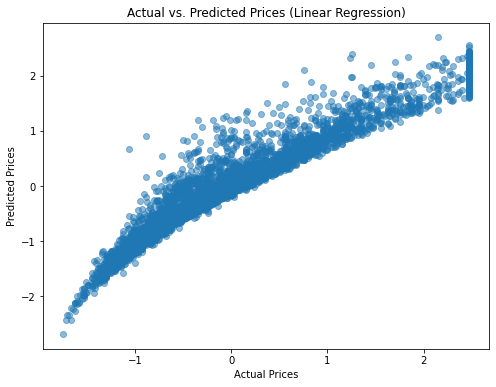

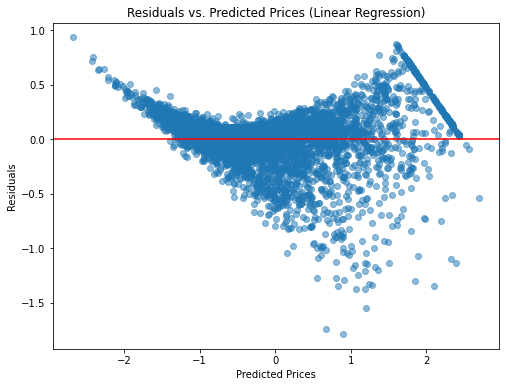

In [42]:
# Linear Regression
# Scatterplot of Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

residuals_lm = y_test - y_pred

# Scatterplot of Rediduals vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_lm, alpha=0.5)
plt.axhline(y=0, color="red")
plt.title("Residuals vs. Predicted Prices (Linear Regression)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


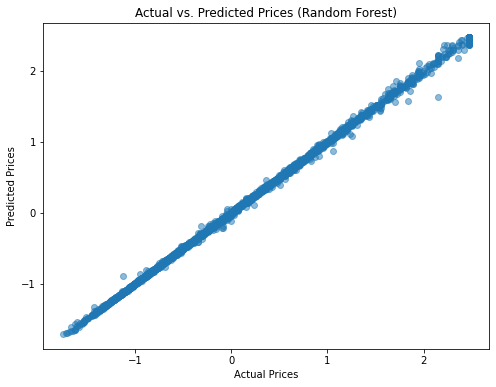

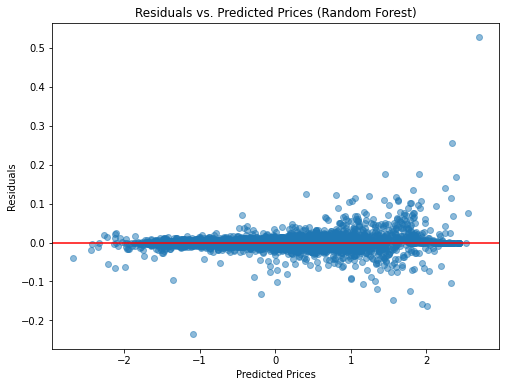

In [41]:
# Random Forest
# Scatterplot of Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.show()

residuals_rf = y_test - rf_pred

# Scatterplot of Rediduals vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_rf, alpha=0.5)
plt.axhline(y=0, color="red")
plt.title("Residuals vs. Predicted Prices (Random Forest)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


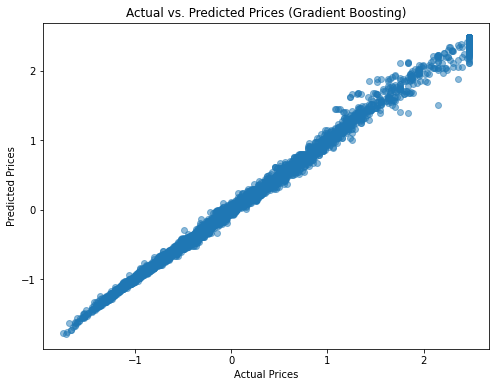

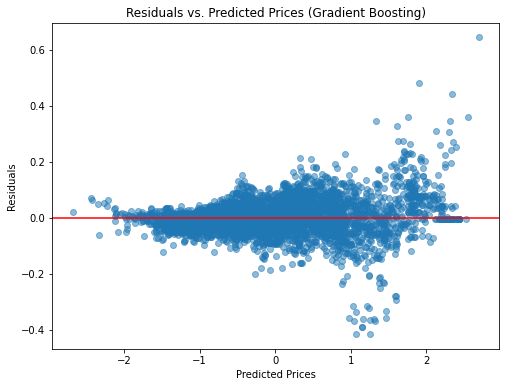

In [40]:
# Gradient Boosting
# Scatterplot of Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Gradient Boosting)")
plt.show()

residuals_gb = y_test - gb_pred

# Scatterplot of Rediduals vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_gb, alpha=0.5)
plt.axhline(y=0, color="red")
plt.title("Residuals vs. Predicted Prices (Gradient Boosting)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


In [26]:
# Define parameter grid
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None]
}

# Grid Search
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)

# Best Parameters
print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

# Evaluate on Test Set
rf_best_pred = rf_best.predict(X_test)
print(f"Random Forest Tuned -> MSE: {mean_squared_error(y_test, rf_best_pred):.4f}, R^2: {r2_score(y_test, rf_best_pred):.4f}")


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 300}
Random Forest Tuned -> MSE: 0.0004, R^2: 0.9996


In [27]:
# Define parameter grid
gb_param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

# Grid Search
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, scoring='r2')
gb_grid.fit(X_train, y_train)

# Best Parameters
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
gb_best = gb_grid.best_estimator_

# Evaluate on Test Set
gb_best_pred = gb_best.predict(X_test)
print(f"Gradient Boosting Tuned -> MSE: {mean_squared_error(y_test, gb_best_pred):.4f}, R^2: {r2_score(y_test, gb_best_pred):.4f}")


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Gradient Boosting Tuned -> MSE: 0.0017, R^2: 0.9982


In [28]:
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 300}


In [29]:
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'n_estimators': 300}


In [30]:
# Feature importance for Random Forest
rf_importances = rf_best.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf_importances):
    print(f"{feature}: {importance:.4f}")

# Feature importance for Gradient Boosting
gb_importances = gb_best.feature_importances_
print("Gradient Boosting Feature Importances:")
for feature, importance in zip(X.columns, gb_importances):
    print(f"{feature}: {importance:.4f}")


Random Forest Feature Importances:
sqft_living: 0.2692
bedrooms: 0.0001
bathrooms: 0.0001
grade: 0.3893
price_per_sqft: 0.3411
bedrooms_to_bathrooms_ratio: 0.0002
Gradient Boosting Feature Importances:
sqft_living: 0.3812
bedrooms: 0.0000
bathrooms: 0.0000
grade: 0.2446
price_per_sqft: 0.3742
bedrooms_to_bathrooms_ratio: 0.0000


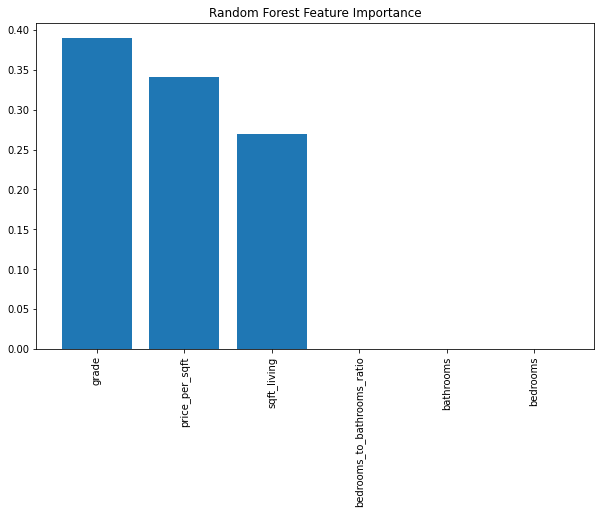

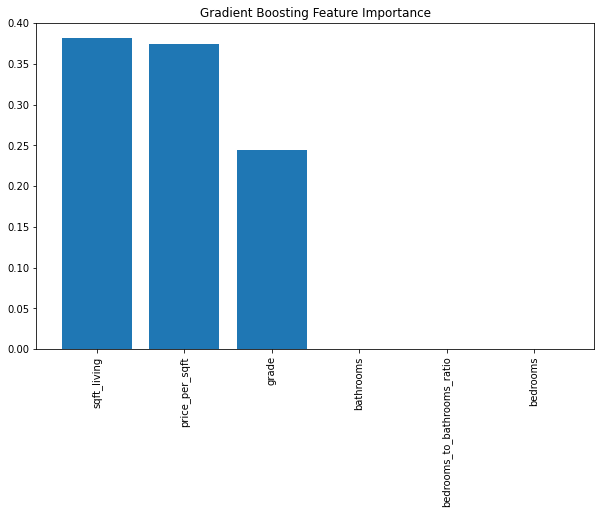

In [31]:
# Random Forest
plt.figure(figsize=(10, 6))
indices = np.argsort(rf_importances)[::-1]
plt.bar(range(X.shape[1]), rf_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()

# Gradient Boosting
plt.figure(figsize=(10, 6))
indices = np.argsort(gb_importances)[::-1]
plt.bar(range(X.shape[1]), gb_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Gradient Boosting Feature Importance")
plt.show()


In [61]:
# k-folds cross validation
k_folds = KFold(n_splits = 10)

scores_r2 = cross_val_score(gb_model, X, y, cv = k_folds, scoring='r2')

print("Cross Validation Scores (R^2): ", scores_r2)
print(f"Average CV Score (R^2): {scores_r2.mean():.4f}")
print(f"Standard deviation (R^2): {scores_r2.std():.4f}")

scores_mse = cross_val_score(gb_model, X, y, cv=k_folds, scoring='neg_mean_squared_error')

mse_scores_positive = -scores_mse
mean_mse_score = np.mean(mse_scores_positive)
std_mse_score = np.std(mse_scores_positive)

print("\nCross-Validation Scores (MSE):", mse_scores_positive)
print(f"Mean CV Score (MSE): {mean_mse_score:.4f}")
print(f"Standard Deviation (MSE): {std_mse_score:.4f}")


Cross Validation Scores (R^2):  [0.99648817 0.99617922 0.99588381 0.9968234  0.99652339 0.99667873
 0.99692464 0.99661554 0.9966217  0.99514977]
Average CV Score (R^2): 0.9964
Standard deviation (R^2): 0.0005

Cross-Validation Scores (MSE): [0.00348521 0.00393118 0.00402875 0.00308708 0.00324056 0.00336632
 0.00306086 0.00352811 0.00341753 0.00482016]
Mean CV Score (MSE): 0.0036
Standard Deviation (MSE): 0.0005
